<a href="https://www.kaggle.com/code/dishantkharkar/insights-into-steel-plate-defects-eda-notebook?scriptVersionId=166519030" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

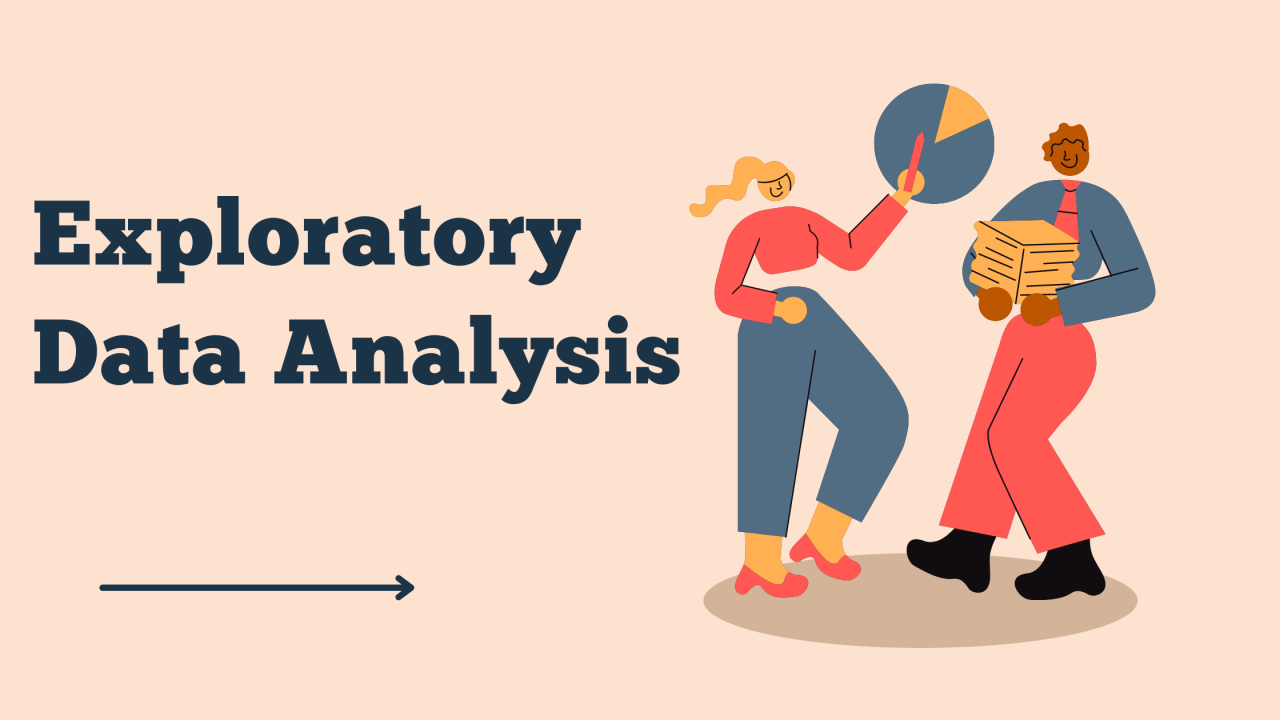

# **1. Install Dependencies**

In [1]:
import numpy as np
import pandas as pd

import seaborn as sns
import matplotlib.pyplot as plt
from tqdm import tqdm

# Suppress warnings
import warnings

warnings.filterwarnings("ignore")

# **2. Import the Datasets**

In [2]:
train = pd.read_csv('/kaggle/input/playground-series-s4e3/train.csv')
test = pd.read_csv('/kaggle/input/playground-series-s4e3/test.csv')

train.head()

,id,X_Minimum,X_Maximum,Y_Minimum,Y_Maximum,Pixels_Areas,X_Perimeter,Y_Perimeter,Sum_of_Luminosity,Minimum_of_Luminosity,...,Orientation_Index,Luminosity_Index,SigmoidOfAreas,Pastry,Z_Scratch,K_Scatch,Stains,Dirtiness,Bumps,Other_Faults
0,0,584,590,909972,909977,16,8,5,2274,113,...,-0.5000,-0.0104,0.1417,0,0,0,1,0,0,0
1,1,808,816,728350,728372,433,20,54,44478,70,...,0.7419,-0.2997,0.9491,0,0,0,0,0,0,1
2,2,39,192,2212076,2212144,11388,705,420,1311391,29,...,-0.0105,-0.0944,1.0000,0,0,1,0,0,0,0
3,3,781,789,3353146,3353173,210,16,29,3202,114,...,0.6667,-0.0402,0.4025,0,0,1,0,0,0,0
4,4,1540,1560,618457,618502,521,72,67,48231,82,...,0.9158,-0.2455,0.9998,0,0,0,0,0,0,1


# **3. Undestanding The Data**

In [3]:
train.shape

(19219, 35)

In [4]:
test.shape

(12814, 28)

In [5]:
train.describe().T

,count,mean,std,min,25%,50%,75%,max
id,19219.0,9.609000e+03,5.548192e+03,0.0000,4804.50000,9.609000e+03,1.441350e+04,1.921800e+04
X_Minimum,19219.0,7.098547e+02,5.315442e+02,0.0000,49.00000,7.770000e+02,1.152000e+03,1.705000e+03
X_Maximum,19219.0,7.538576e+02,4.998366e+02,4.0000,214.00000,7.960000e+02,1.165000e+03,1.713000e+03
Y_Minimum,19219.0,1.849756e+06,1.903554e+06,6712.0000,657468.00000,1.398169e+06,2.368032e+06,1.298766e+07
Y_Maximum,19219.0,1.846605e+06,1.896295e+06,6724.0000,657502.00000,1.398179e+06,2.362511e+06,1.298769e+07
Pixels_Areas,19219.0,1.683988e+03,3.730320e+03,6.0000,89.00000,1.680000e+02,6.530000e+02,1.526550e+05
X_Perimeter,19219.0,9.565466e+01,1.778214e+02,2.0000,15.00000,2.500000e+01,6.400000e+01,7.553000e+03
Y_Perimeter,19219.0,6.412410e+01,1.010542e+02,1.0000,14.00000,2.300000e+01,6.100000e+01,9.030000e+02
Sum_of_Luminosity,19219.0,1.918467e+05,4.420247e+05,250.0000,9848.00000,1.823800e+04,6.797800e+04,1.159141e+07
Minimum_of_Luminosity,19219.0,8.480842e+01,2.880034e+01,0.0000,70.00000,9.000000e+01,1.050000e+02,1.960000e+02


In [6]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19219 entries, 0 to 19218
Data columns (total 35 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   id                     19219 non-null  int64  
 1   X_Minimum              19219 non-null  int64  
 2   X_Maximum              19219 non-null  int64  
 3   Y_Minimum              19219 non-null  int64  
 4   Y_Maximum              19219 non-null  int64  
 5   Pixels_Areas           19219 non-null  int64  
 6   X_Perimeter            19219 non-null  int64  
 7   Y_Perimeter            19219 non-null  int64  
 8   Sum_of_Luminosity      19219 non-null  int64  
 9   Minimum_of_Luminosity  19219 non-null  int64  
 10  Maximum_of_Luminosity  19219 non-null  int64  
 11  Length_of_Conveyer     19219 non-null  int64  
 12  TypeOfSteel_A300       19219 non-null  int64  
 13  TypeOfSteel_A400       19219 non-null  int64  
 14  Steel_Plate_Thickness  19219 non-null  int64  
 15  Ed

In [7]:
train.columns

Index(['id', 'X_Minimum', 'X_Maximum', 'Y_Minimum', 'Y_Maximum',
       'Pixels_Areas', 'X_Perimeter', 'Y_Perimeter', 'Sum_of_Luminosity',
       'Minimum_of_Luminosity', 'Maximum_of_Luminosity', 'Length_of_Conveyer',
       'TypeOfSteel_A300', 'TypeOfSteel_A400', 'Steel_Plate_Thickness',
       'Edges_Index', 'Empty_Index', 'Square_Index', 'Outside_X_Index',
       'Edges_X_Index', 'Edges_Y_Index', 'Outside_Global_Index', 'LogOfAreas',
       'Log_X_Index', 'Log_Y_Index', 'Orientation_Index', 'Luminosity_Index',
       'SigmoidOfAreas', 'Pastry', 'Z_Scratch', 'K_Scatch', 'Stains',
       'Dirtiness', 'Bumps', 'Other_Faults'],
      dtype='object')

## Features

### Spatial Features:
- **'X_Minimum', 'X_Maximum', 'Y_Minimum', 'Y_Maximum'**: Coordinates of the bounding box of the defect.
- **'X_Perimeter', 'Y_Perimeter'**: Perimeter of the defect in the X and Y directions.

### Size and Shape Features:
- **'Pixels_Areas'**: Total number of pixels that make up the defect.
- **'LogOfAreas'**: Logarithmic transformation of 'Pixels_Areas'.
- **'Log_X_Index', 'Log_Y_Index'**: Logarithmic transformations of 'X_Index' and 'Y_Index'.
- **'Edges_Index', 'Empty_Index', 'Square_Index'**: Indices related to the shape of the defect.
- **'Outside_X_Index', 'Edges_X_Index', 'Edges_Y_Index', 'Outside_Global_Index'**: Indices related to the location of the defect.

### Luminosity Features:
- **'Sum_of_Luminosity'**: Total brightness of the defect.
- **'Minimum_of_Luminosity', 'Maximum_of_Luminosity'**: The darkest and brightest points of the defect.
- **'Luminosity_Index'**: Index related to the overall brightness of the defect.

### Production Process Features:
- **'Length_of_Conveyer'**: Length of the conveyor belt used in manufacturing.
- **'Steel_Plate_Thickness'**: Thickness of the steel plate.
- **'TypeOfSteel_A300', 'TypeOfSteel_A400'**: Categorical features indicating the type of steel used.

### Transformation Features:
- **'SigmoidOfAreas'**: Sigmoid transformation of the 'Pixels_Areas' feature.

### Defect Type Features:
- **'Pastry', 'Z_Scratch', 'K_Scratch', 'Stains', 'Dirtiness', 'Bumps', 'Other_Faults'**: Binary or categorical features indicating the presence or absence of specific types of defects.

In [8]:
# lets undestand the data without target columns

train.iloc[:,:-7].describe().T

,count,mean,std,min,25%,50%,75%,max
id,19219.0,9.609000e+03,5.548192e+03,0.0000,4804.50000,9.609000e+03,1.441350e+04,1.921800e+04
X_Minimum,19219.0,7.098547e+02,5.315442e+02,0.0000,49.00000,7.770000e+02,1.152000e+03,1.705000e+03
X_Maximum,19219.0,7.538576e+02,4.998366e+02,4.0000,214.00000,7.960000e+02,1.165000e+03,1.713000e+03
Y_Minimum,19219.0,1.849756e+06,1.903554e+06,6712.0000,657468.00000,1.398169e+06,2.368032e+06,1.298766e+07
Y_Maximum,19219.0,1.846605e+06,1.896295e+06,6724.0000,657502.00000,1.398179e+06,2.362511e+06,1.298769e+07
Pixels_Areas,19219.0,1.683988e+03,3.730320e+03,6.0000,89.00000,1.680000e+02,6.530000e+02,1.526550e+05
X_Perimeter,19219.0,9.565466e+01,1.778214e+02,2.0000,15.00000,2.500000e+01,6.400000e+01,7.553000e+03
Y_Perimeter,19219.0,6.412410e+01,1.010542e+02,1.0000,14.00000,2.300000e+01,6.100000e+01,9.030000e+02
Sum_of_Luminosity,19219.0,1.918467e+05,4.420247e+05,250.0000,9848.00000,1.823800e+04,6.797800e+04,1.159141e+07
Minimum_of_Luminosity,19219.0,8.480842e+01,2.880034e+01,0.0000,70.00000,9.000000e+01,1.050000e+02,1.960000e+02


Before passing to the visualization exploration let´s capture some relevant information gained from this preliminary analysis:

* We maked sure that there are no NaN or null values on data
* We can describe some behavior of data distribution from some stats metrics like std.
* The objective is to target predictions considering 7 different classes.

# **4. Exploratory Data Analysis**

## Summary Statistics

In [9]:
train.describe().T

,count,mean,std,min,25%,50%,75%,max
id,19219.0,9.609000e+03,5.548192e+03,0.0000,4804.50000,9.609000e+03,1.441350e+04,1.921800e+04
X_Minimum,19219.0,7.098547e+02,5.315442e+02,0.0000,49.00000,7.770000e+02,1.152000e+03,1.705000e+03
X_Maximum,19219.0,7.538576e+02,4.998366e+02,4.0000,214.00000,7.960000e+02,1.165000e+03,1.713000e+03
Y_Minimum,19219.0,1.849756e+06,1.903554e+06,6712.0000,657468.00000,1.398169e+06,2.368032e+06,1.298766e+07
Y_Maximum,19219.0,1.846605e+06,1.896295e+06,6724.0000,657502.00000,1.398179e+06,2.362511e+06,1.298769e+07
Pixels_Areas,19219.0,1.683988e+03,3.730320e+03,6.0000,89.00000,1.680000e+02,6.530000e+02,1.526550e+05
X_Perimeter,19219.0,9.565466e+01,1.778214e+02,2.0000,15.00000,2.500000e+01,6.400000e+01,7.553000e+03
Y_Perimeter,19219.0,6.412410e+01,1.010542e+02,1.0000,14.00000,2.300000e+01,6.100000e+01,9.030000e+02
Sum_of_Luminosity,19219.0,1.918467e+05,4.420247e+05,250.0000,9848.00000,1.823800e+04,6.797800e+04,1.159141e+07
Minimum_of_Luminosity,19219.0,8.480842e+01,2.880034e+01,0.0000,70.00000,9.000000e+01,1.050000e+02,1.960000e+02


## **Univariate Analysis**

  0%|          | 0/23 [00:00<?, ?it/s]

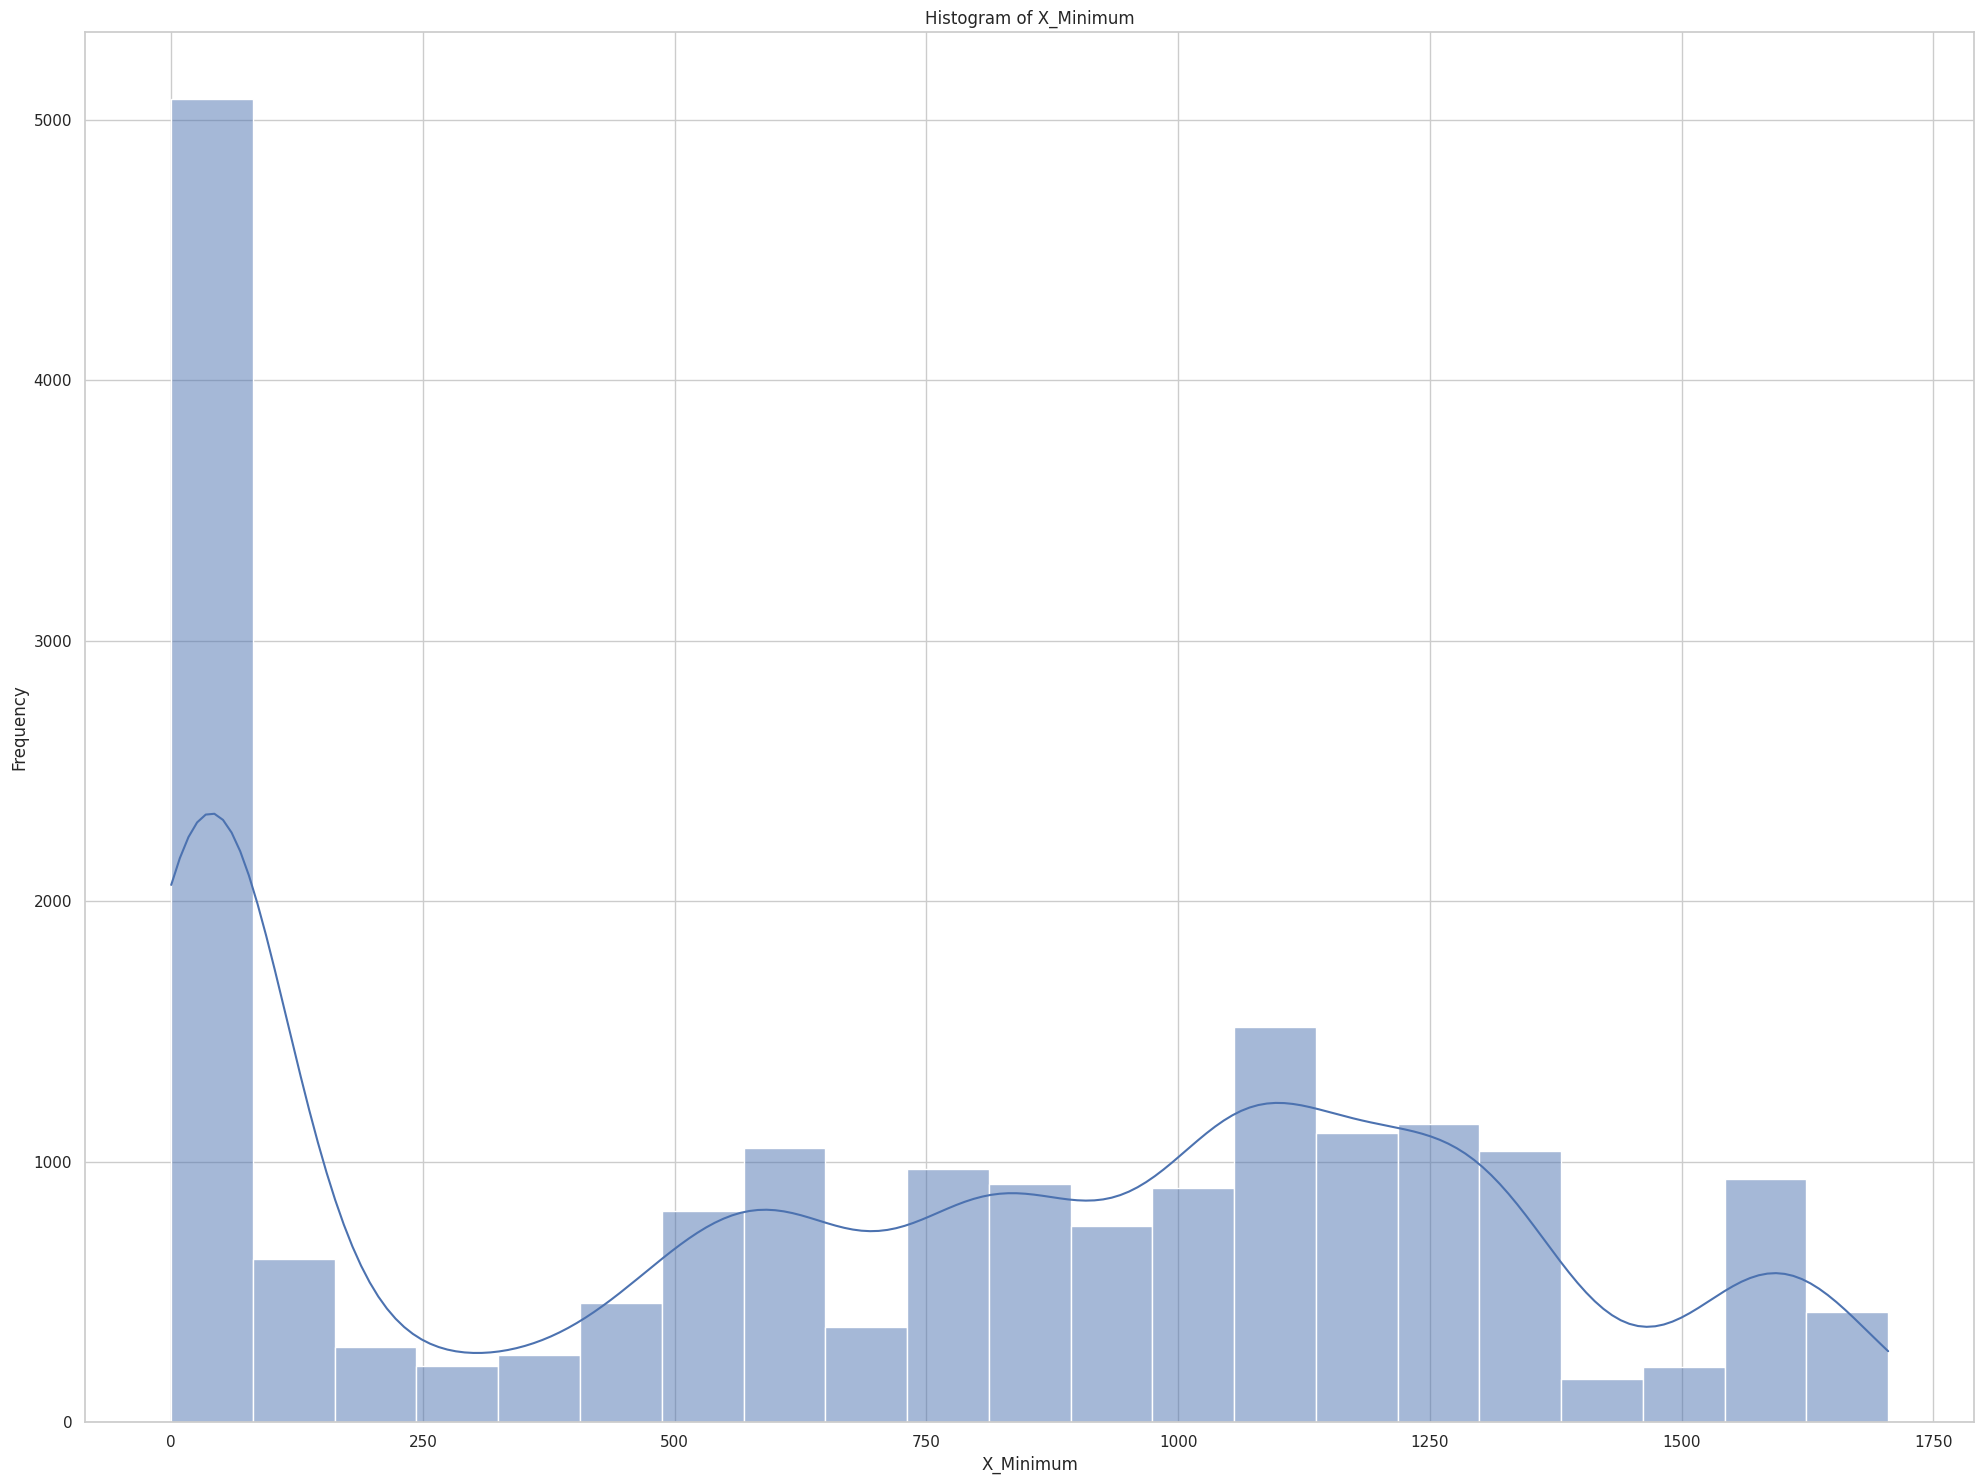

  4%|▍         | 1/23 [00:01<00:24,  1.10s/it]

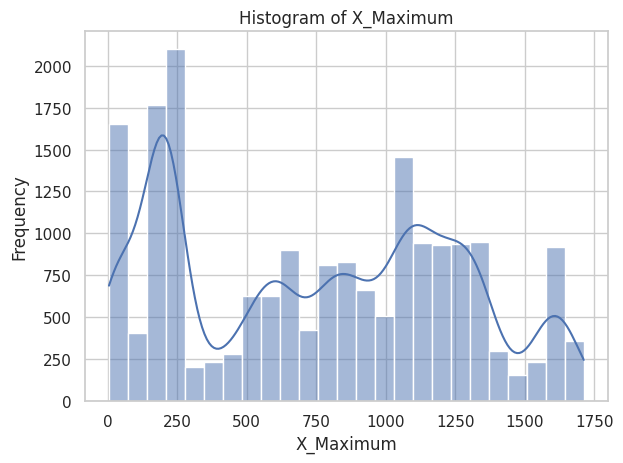

  9%|▊         | 2/23 [00:01<00:18,  1.16it/s]

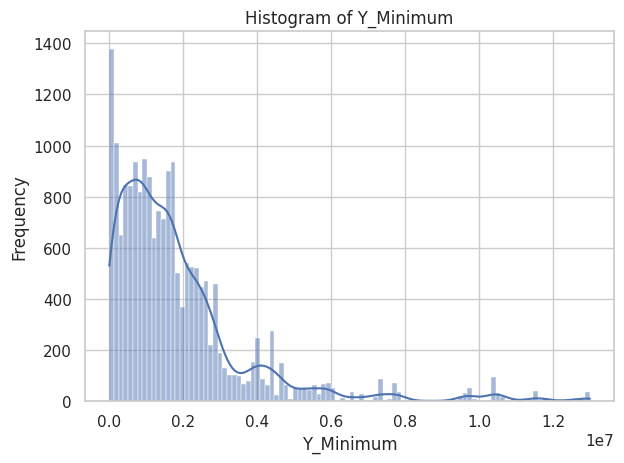

 13%|█▎        | 3/23 [00:02<00:16,  1.19it/s]

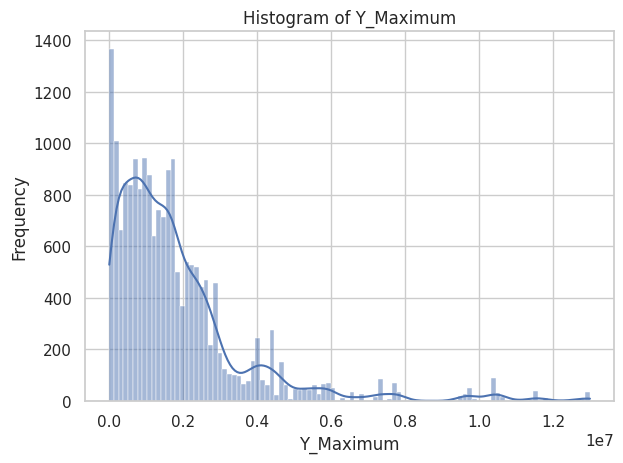

 17%|█▋        | 4/23 [00:03<00:15,  1.23it/s]

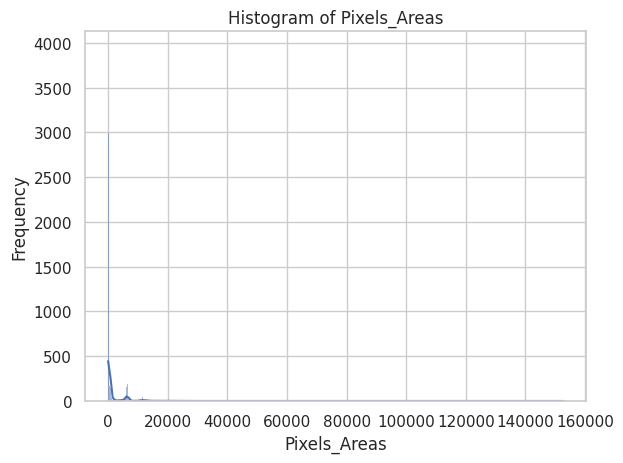

 22%|██▏       | 5/23 [00:10<00:56,  3.15s/it]

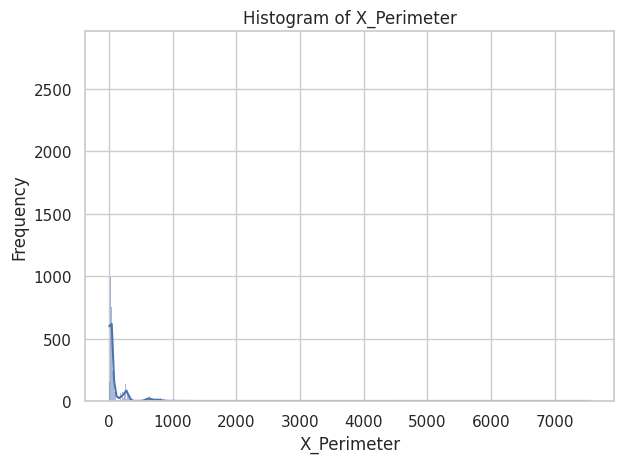

 26%|██▌       | 6/23 [00:15<01:01,  3.64s/it]

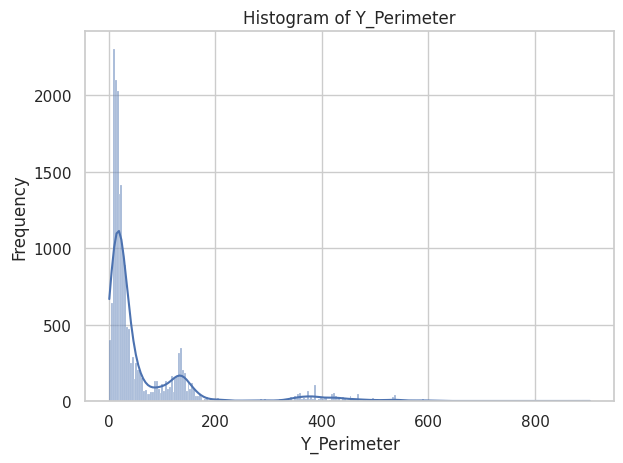

 30%|███       | 7/23 [00:16<00:44,  2.81s/it]

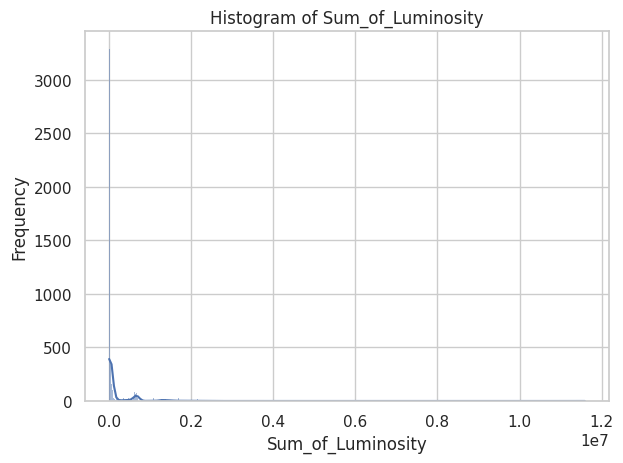

 35%|███▍      | 8/23 [00:22<00:57,  3.80s/it]

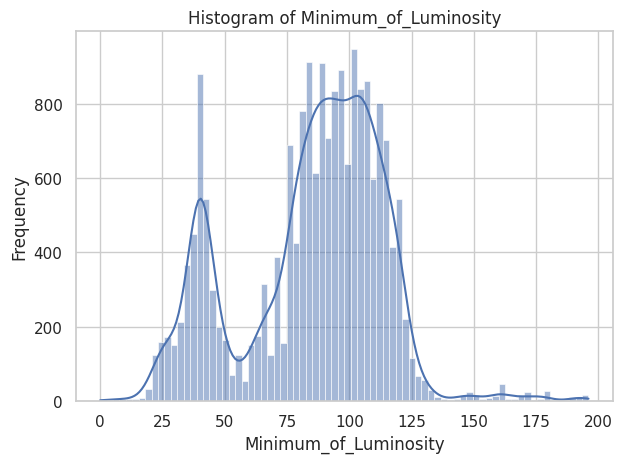

 39%|███▉      | 9/23 [00:23<00:43,  3.07s/it]

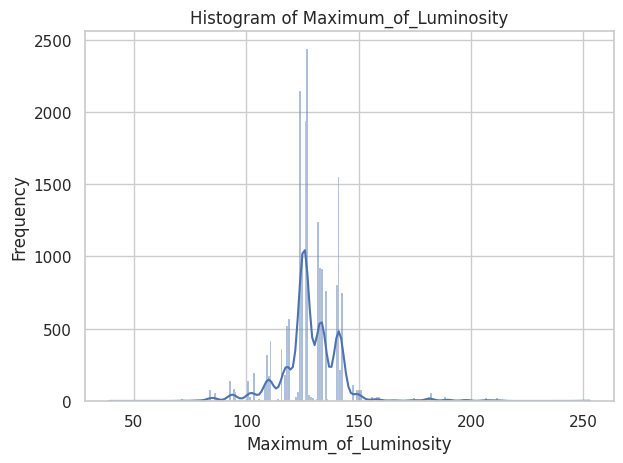

 43%|████▎     | 10/23 [00:24<00:32,  2.47s/it]

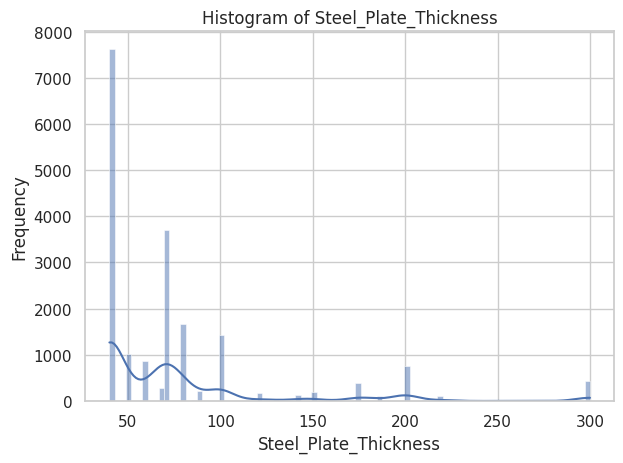

 48%|████▊     | 11/23 [00:25<00:23,  1.97s/it]

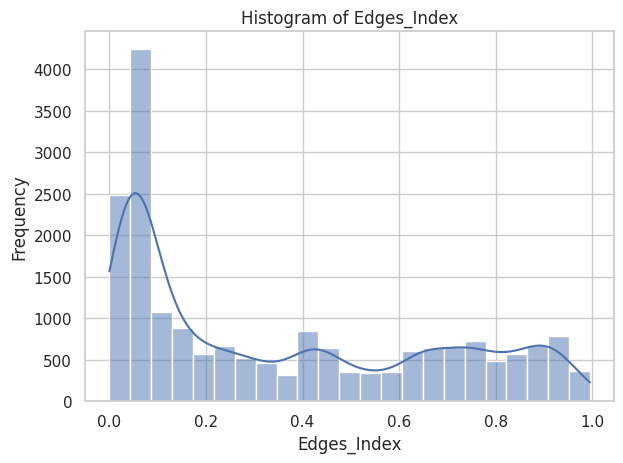

 52%|█████▏    | 12/23 [00:26<00:17,  1.60s/it]

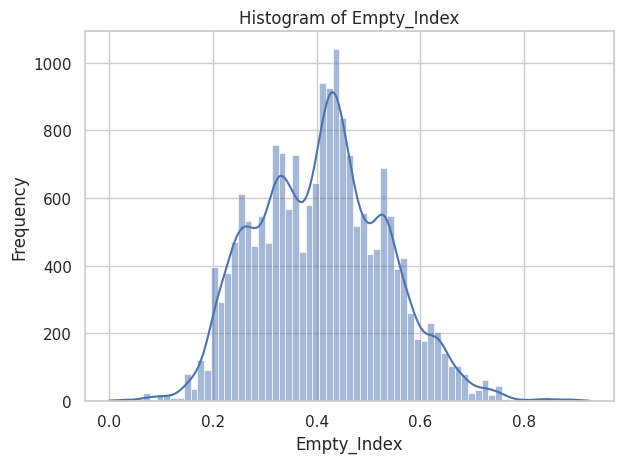

 57%|█████▋    | 13/23 [00:27<00:13,  1.35s/it]

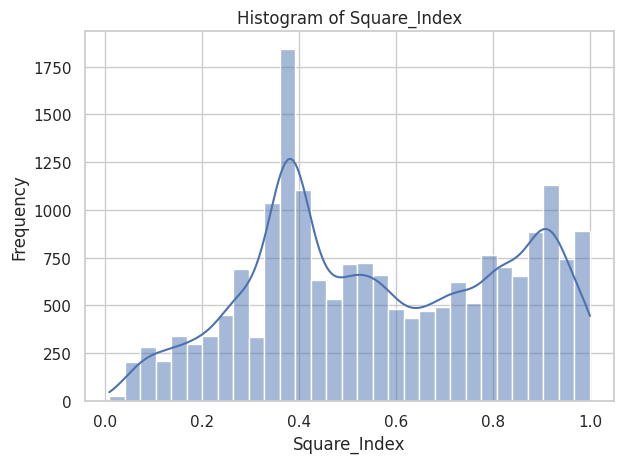

 61%|██████    | 14/23 [00:27<00:10,  1.17s/it]

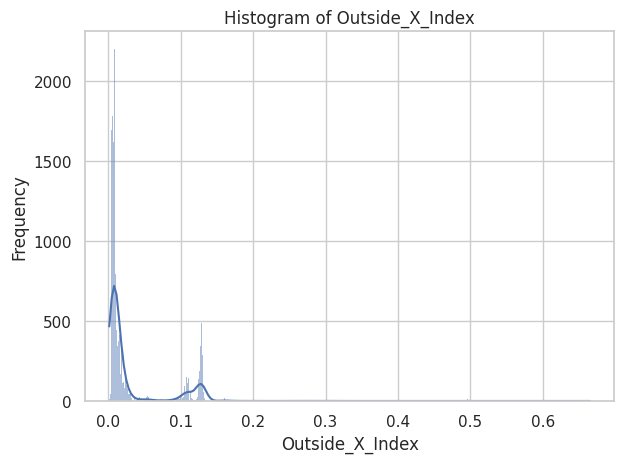

 65%|██████▌   | 15/23 [00:30<00:12,  1.57s/it]

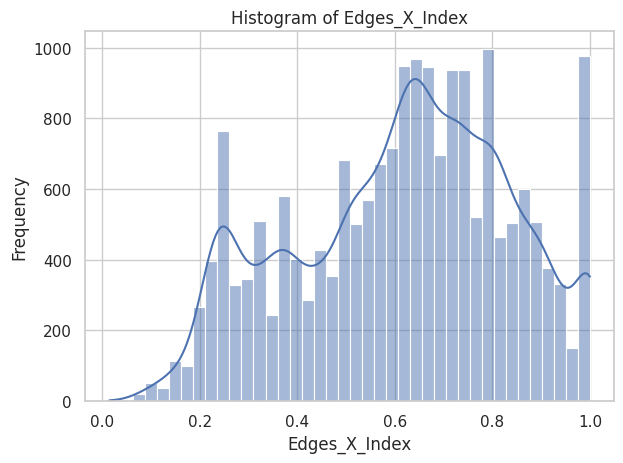

 70%|██████▉   | 16/23 [00:31<00:09,  1.32s/it]

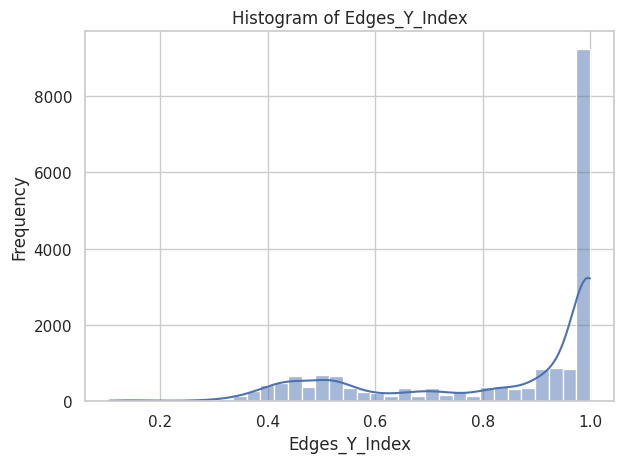

 74%|███████▍  | 17/23 [00:31<00:06,  1.14s/it]

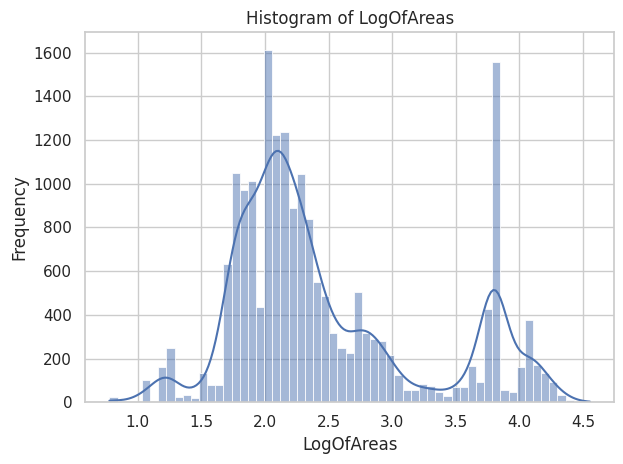

 78%|███████▊  | 18/23 [00:32<00:05,  1.07s/it]

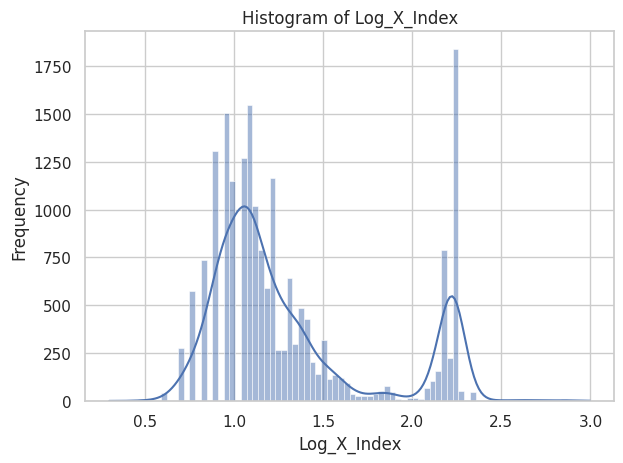

 83%|████████▎ | 19/23 [00:33<00:03,  1.04it/s]

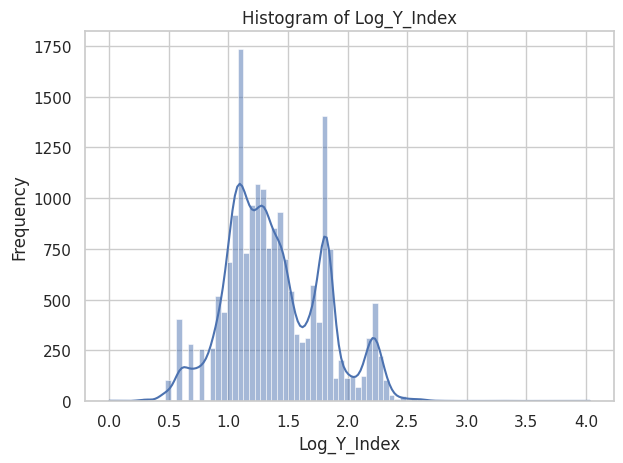

 87%|████████▋ | 20/23 [00:34<00:02,  1.10it/s]

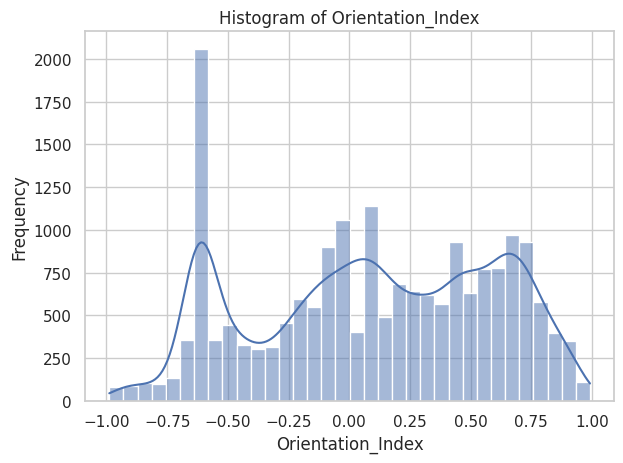

 91%|█████████▏| 21/23 [00:35<00:01,  1.17it/s]

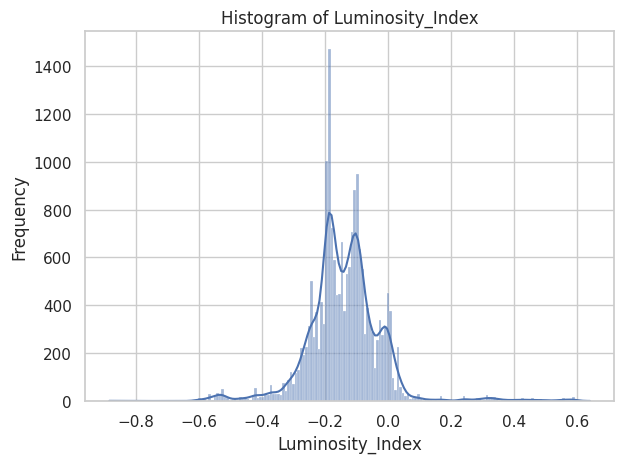

 96%|█████████▌| 22/23 [00:36<00:00,  1.12it/s]

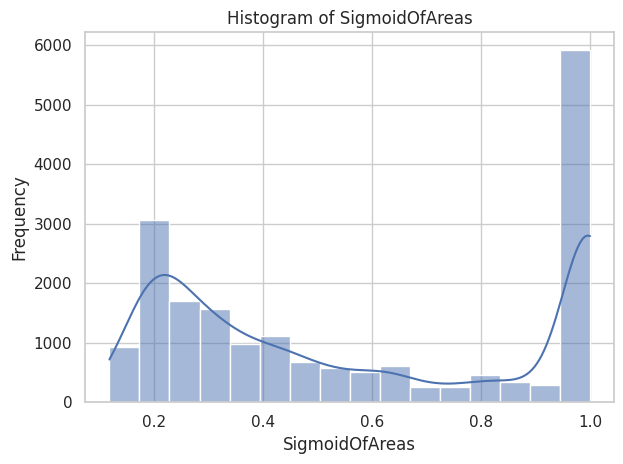

100%|██████████| 23/23 [00:36<00:00,  1.60s/it]

univariate analysis plots: 


In [10]:
# set the style of the seaborn 
sns.set(style="whitegrid")

# Initialize the fig
plt.figure(figsize=(20,15))

# List of numerical columns for univariate analysis
numerical_cols = ['X_Minimum', 'X_Maximum', 'Y_Minimum', 'Y_Maximum', 'Pixels_Areas', 'X_Perimeter', 'Y_Perimeter', 'Sum_of_Luminosity', 'Minimum_of_Luminosity', 'Maximum_of_Luminosity', 'Steel_Plate_Thickness', 'Edges_Index', 'Empty_Index', 'Square_Index', 'Outside_X_Index', 'Edges_X_Index', 'Edges_Y_Index', 'LogOfAreas', 'Log_X_Index', 'Log_Y_Index', 'Orientation_Index', 'Luminosity_Index', 'SigmoidOfAreas']

# plotting histogram for Numerical column
for col in tqdm(numerical_cols):
    sns.histplot(train[col], kde=True)
    plt.title('Histogram of '+ col)
    plt.xlabel(col)
    plt.ylabel('Frequency')
    # Adjust layout and spacing
    plt.tight_layout()
    plt.show()
    
print('univariate analysis plots: ')

## Analysis:

1. **X_Minimum and X_Maximum**:
   - The distribution of values for X_Minimum and X_Maximum appears to be relatively uniform, with some variations in the frequency of values.

2. **Y_Minimum and Y_Maximum**:
   - Y_Minimum and Y_Maximum also exhibit a somewhat uniform distribution, with a range of values present in the dataset.

3. **Pixels_Areas and X_Perimeter**:
   - Pixels_Areas and X_Perimeter show a right-skewed distribution, indicating that there may be outliers with higher values in these features.

4. **Y_Perimeter and Sum_of_Luminosity**:
   - Y_Perimeter and Sum_of_Luminosity have distributions that are slightly skewed to the right, suggesting the presence of outliers with higher values.

5. **Minimum_of_Luminosity and Maximum_of_Luminosity**:
   - The distribution of Minimum_of_Luminosity and Maximum_of_Luminosity appears to be relatively uniform, with values spread across the range.

6. **Steel_Plate_Thickness and Edges_Index**:
   - Steel_Plate_Thickness and Edges_Index exhibit varying distributions, with Steel_Plate_Thickness showing a more uniform distribution compared to Edges_Index.

7. **Empty_Index and Square_Index**:
   - Empty_Index and Square_Index have distributions that are relatively uniform, indicating a spread of values across these features.

8. **Outside_X_Index and Edges_X_Index**:
   - Outside_X_Index and Edges_X_Index show distributions with some variations in the frequency of values, suggesting different patterns in the data.

9. **Edges_Y_Index and LogOfAreas**:
   - Edges_Y_Index and LogOfAreas exhibit distributions that are relatively uniform, with values spread across the range of the features.

10. **Log_X_Index and Log_Y_Index**:
    - Log_X_Index and Log_Y_Index show distributions that are somewhat skewed, indicating potential outliers or non-uniformity in the data.

11. **Orientation_Index and Luminosity_Index**:
    - Orientation_Index and Luminosity_Index have distributions that vary, with some values occurring more frequently than others.

12. **SigmoidOfAreas**:
    - SigmoidOfAreas shows a distribution with variations in the frequency of values, suggesting different patterns in the data.

These observations provide initial insights into the distribution of numerical features in the dataset

## **Bivariate Analysis**

In [11]:
train.head()

,id,X_Minimum,X_Maximum,Y_Minimum,Y_Maximum,Pixels_Areas,X_Perimeter,Y_Perimeter,Sum_of_Luminosity,Minimum_of_Luminosity,...,Orientation_Index,Luminosity_Index,SigmoidOfAreas,Pastry,Z_Scratch,K_Scatch,Stains,Dirtiness,Bumps,Other_Faults
0,0,584,590,909972,909977,16,8,5,2274,113,...,-0.5000,-0.0104,0.1417,0,0,0,1,0,0,0
1,1,808,816,728350,728372,433,20,54,44478,70,...,0.7419,-0.2997,0.9491,0,0,0,0,0,0,1
2,2,39,192,2212076,2212144,11388,705,420,1311391,29,...,-0.0105,-0.0944,1.0000,0,0,1,0,0,0,0
3,3,781,789,3353146,3353173,210,16,29,3202,114,...,0.6667,-0.0402,0.4025,0,0,1,0,0,0,0
4,4,1540,1560,618457,618502,521,72,67,48231,82,...,0.9158,-0.2455,0.9998,0,0,0,0,0,0,1


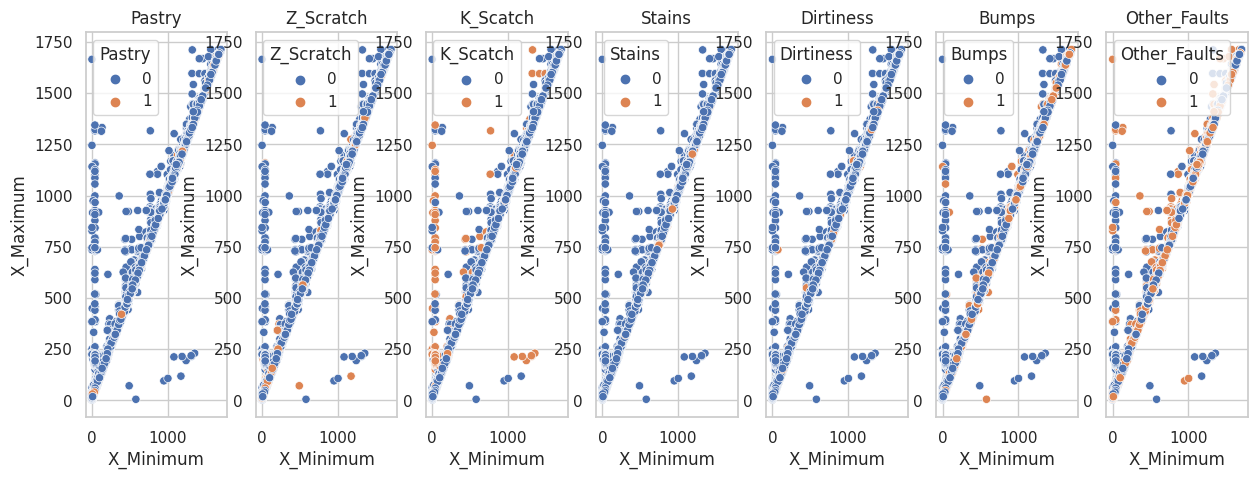

In [12]:
fig, axes = plt.subplots(nrows=1, ncols=7, figsize=(15,5))

for i, target_name in enumerate(train.iloc[:, -7:].columns):
    if i < 7:  # Ensure we don't exceed the number of subplots
        ax = axes[i]  # Select the appropriate subplot
        sns.scatterplot(data=train, y='X_Maximum', x='X_Minimum', hue=target_name, ax=ax)
        ax.set_title(target_name)  # Set the title for each subplot
plt.show()

Right now we can´t observe a clear split of data from this type of plot, let´s try to show the distribution of data.

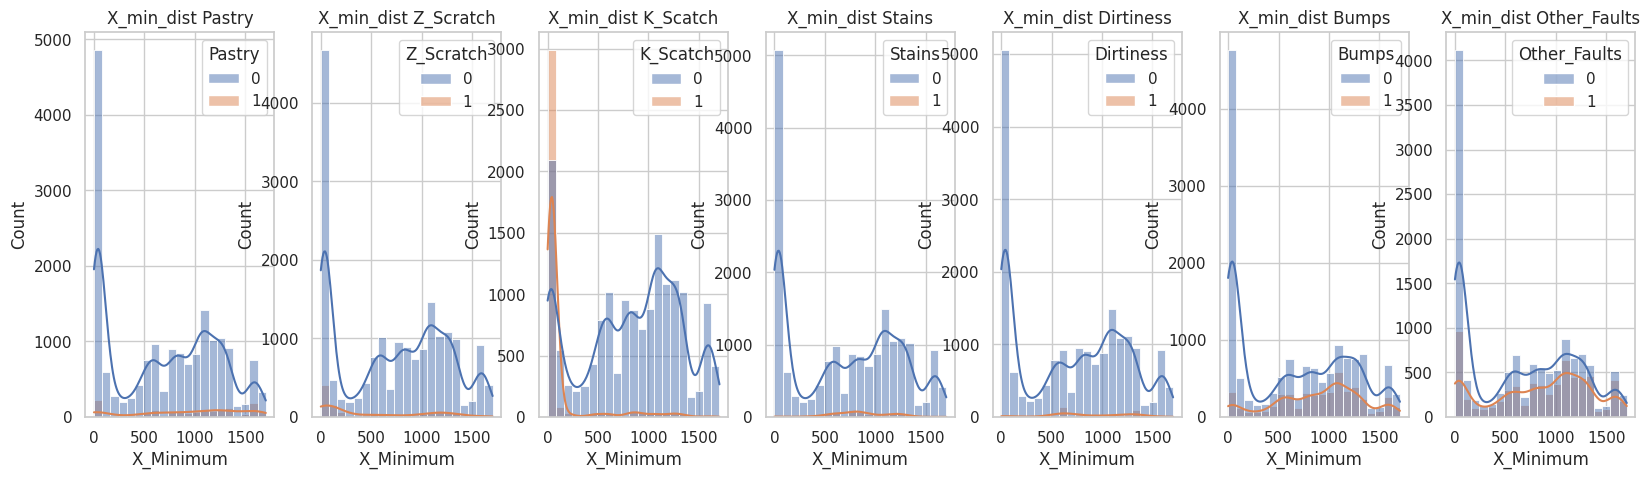

In [13]:
fig, axes = plt.subplots(nrows=1, ncols=7, figsize=(20, 5))
for i, target_name in enumerate(train.iloc[:, -7:].columns):
  sns.histplot(data=train, x="X_Minimum", ax=axes[i], hue=target_name, kde=True)
  axes[i].set_title(f"X_min_dist {target_name}")
    
plt.show()


## **Multivariate Analysis**

<Figure size 2500x800 with 0 Axes>

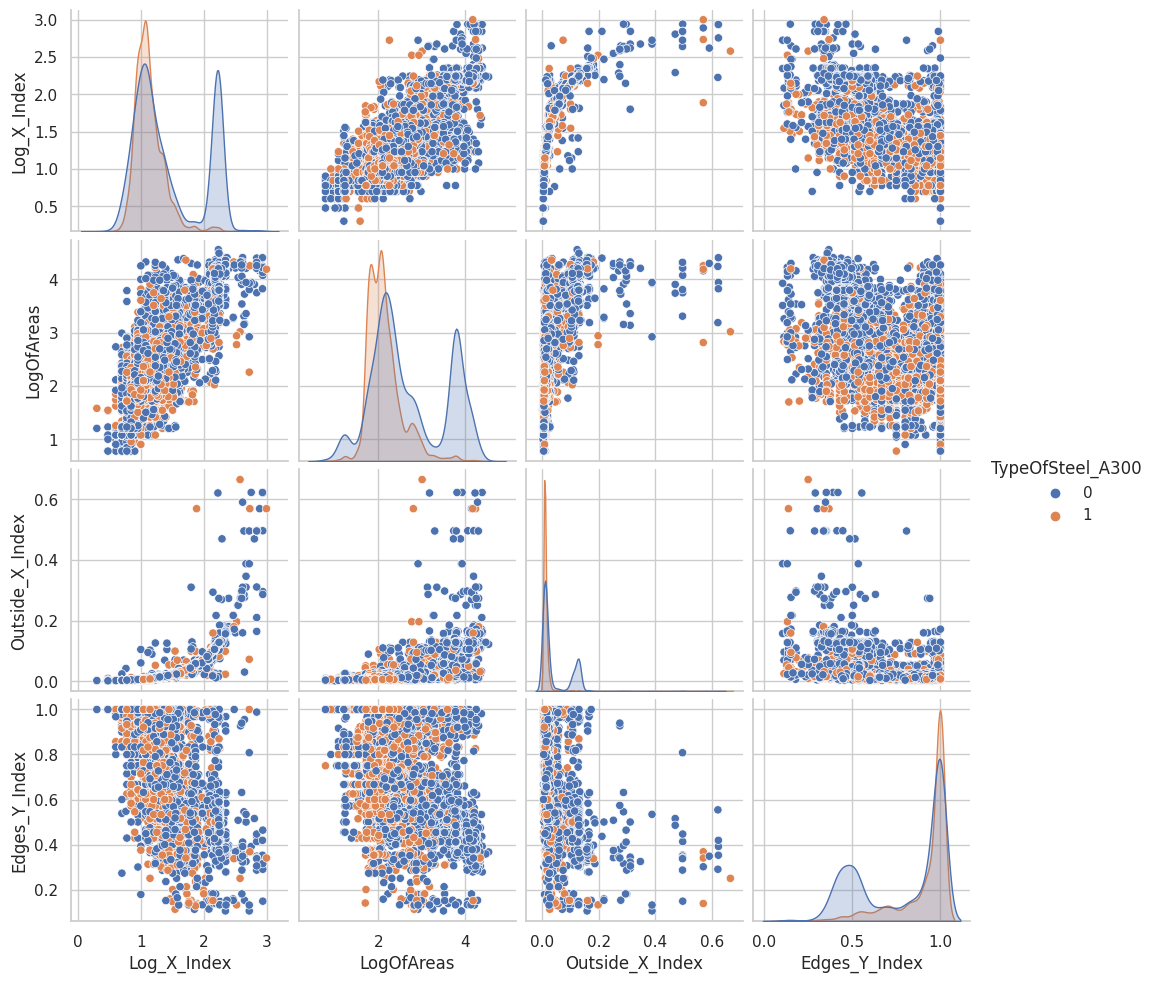

In [14]:
plt.figure(figsize=(25,8))
sns.pairplot(data=train, vars=["Log_X_Index", "LogOfAreas", "Outside_X_Index", "Edges_Y_Index"], hue="TypeOfSteel_A300")

## **Correlation Matrix**

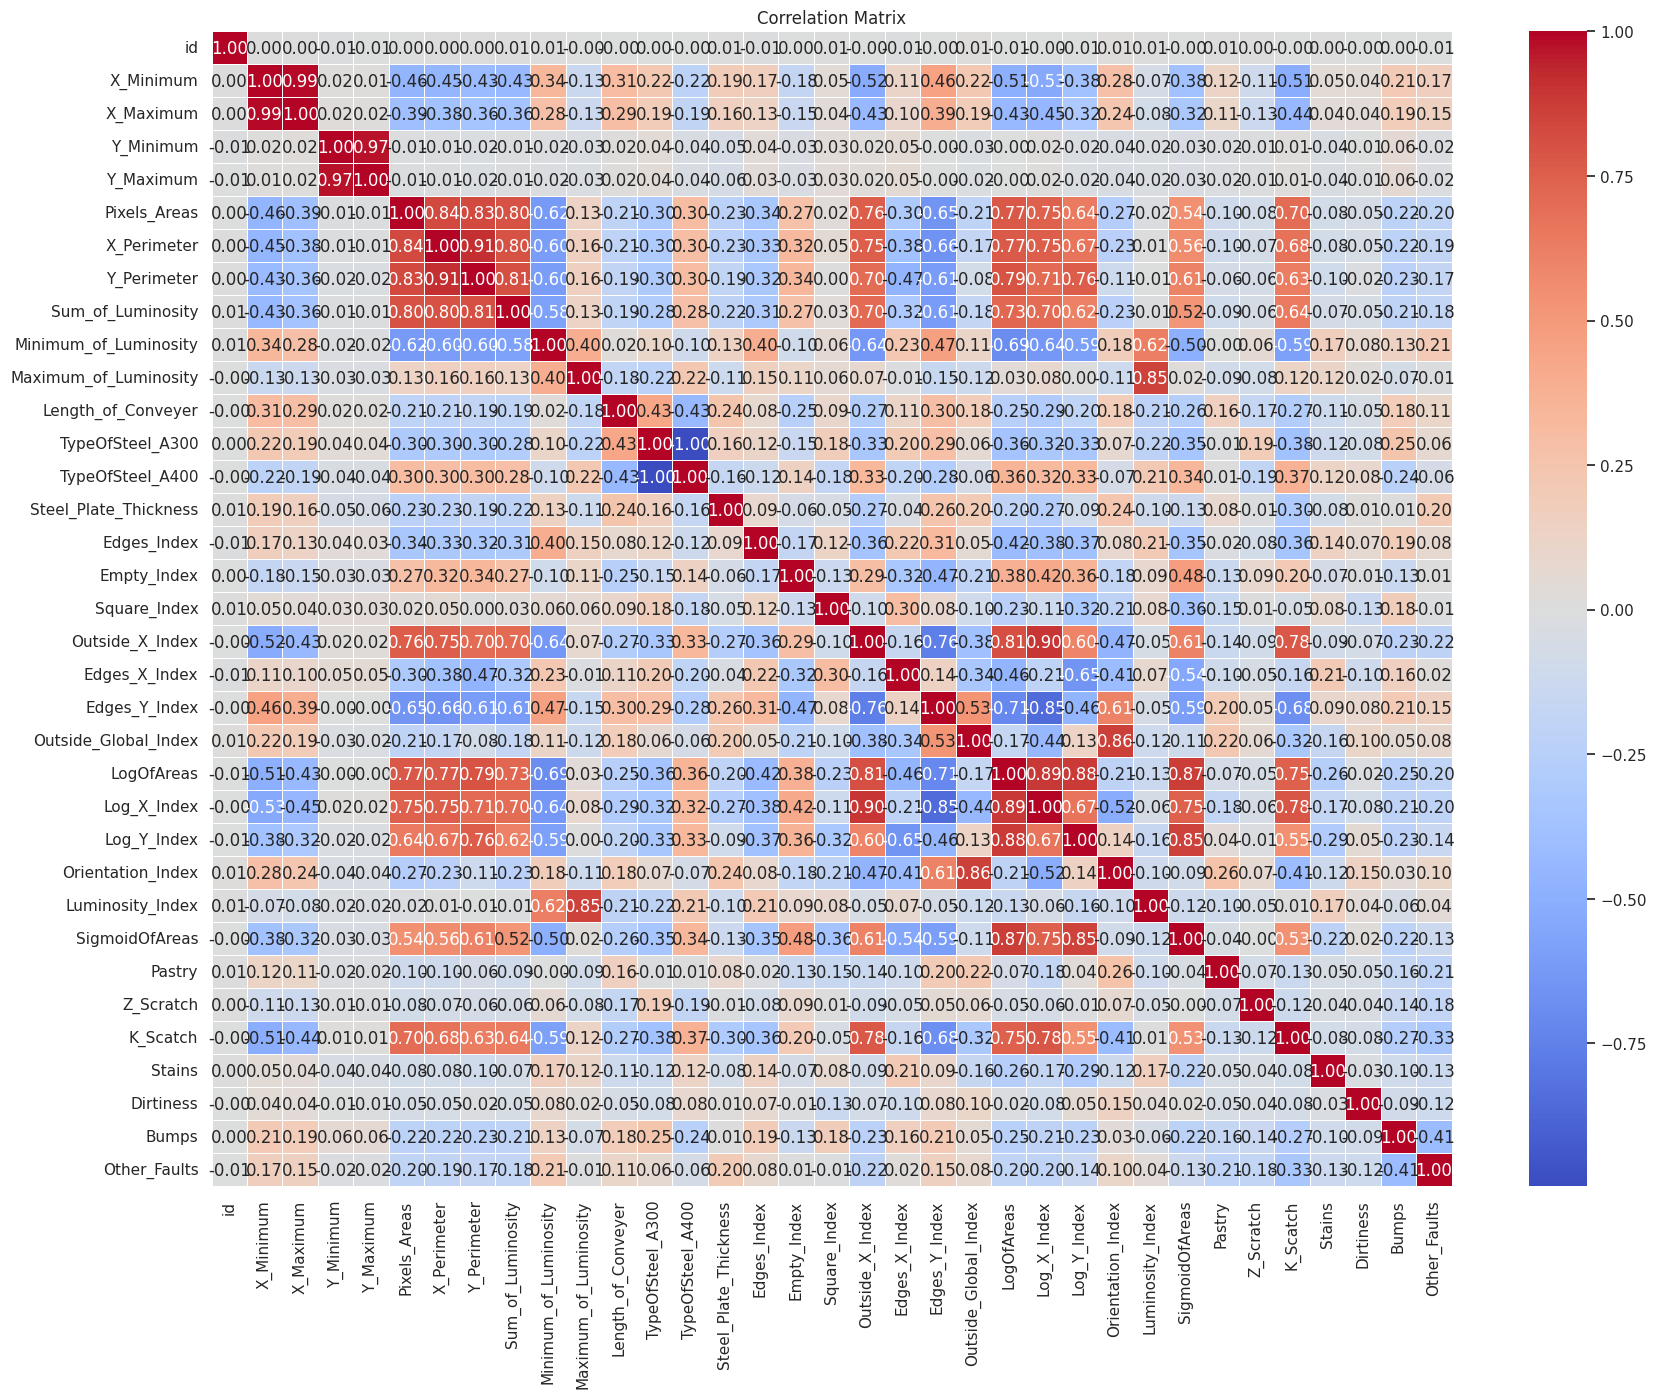

In [15]:
# Compute the correlation matrix
corr_matrix = train.corr()

# Plot the correlation matrix as a heatmap
plt.figure(figsize=(20, 15))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title("Correlation Matrix")
plt.show()